# Cell usage tracker

Example usage of the qncmbe.cell_usage_tracking module

(Below: copied from the qncmbe.cell_usage_tracking docstring)
This is a tool for estimating effusion cell usage in the QNC-MBE system

Almost everything is contained in the CellUsageCalculator class. The basic idea
is to pull cell temperature data, as stored by Molly, and to pull A, B, C
calibration coefficients from the Excel document which we manually update.

From this, we can estimate the cell usage as a function of time. There are a
number of uncertainties though. This relies on accurate tracking of the A, B, C
coefficients which may not always be true.

More importantly, when we calculate A,B,C coefficients, we calculate them to
find the flux hitting the centre of the wafer. To calculate the element usage,
though, we need to know the total number of atoms leaving the cell.

For now, we assume that for SUMO cells (Ga, In), 3.5% of the total flux hits
the wafer, while for conical cells (Al) 7% of the total flux hits the wafer.
This was determined approximately in 2017 by comparing the estimated usage to
the actual usage.However, it would be worth doing more accurate measurements
in the future.

In [4]:
%matplotlib notebook
%matplotlib notebook

# Enable autocomplete.
# Press <tab> to autocomplete function names
# Press <shift>+<tab> to autocomplete function arguments
%config IPCompleter.greedy=True

from qncmbe.cell_usage_tracking import CellUsageCalculator
from qncmbe.plotting import plt

In [2]:
ucalc = CellUsageCalculator(
    start_date='2019-05-13',
    end_date='2019-12-18',
    cells='Ga1,Ga2,Al1,In1,In2'.split(','),
    cell_pars_file='Z:\\Excell Calculators\\Calibration Parameters V2 2019.xlsx',
    save_dir='.\\saved_cell_data'
)

Saving usage data to .\saved_cell_data\cell_estimated_usage.csv
Total element usage (2019-05-13 to 2019-12-18)
Ga1:  180.08 g   (1.555e+24 atoms)
Ga2:  103.04 g   (8.900e+23 atoms)
Al1:   22.65 g   (5.055e+23 atoms)
In1:   64.53 g   (3.385e+23 atoms)
In2:   95.02 g   (4.984e+23 atoms)


<IPython.core.display.Javascript object>


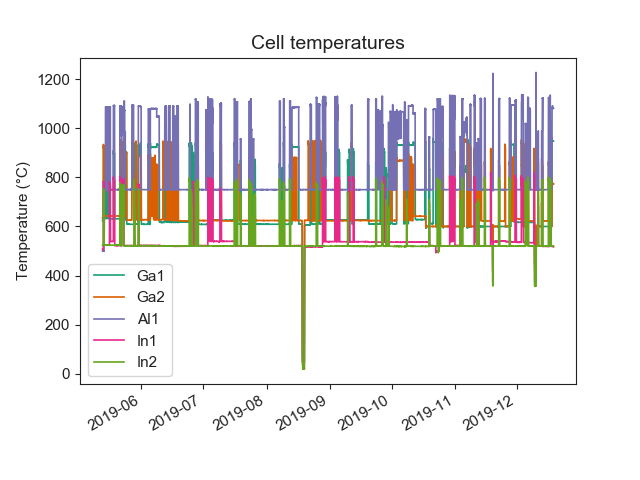

<IPython.core.display.Javascript object>


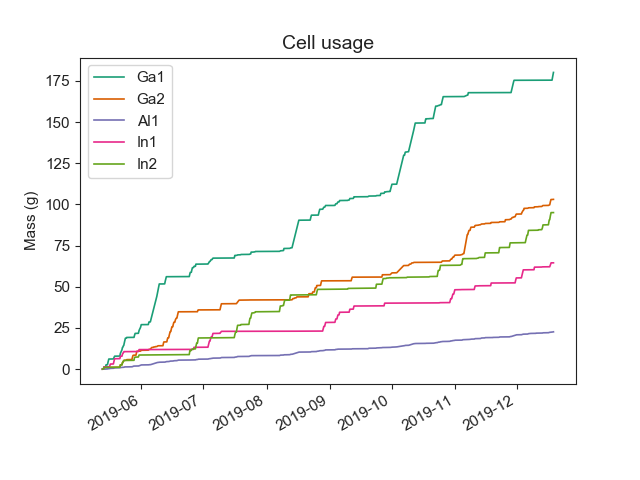

In [5]:


ucalc.print_total_usage()

fig, ax = plt.subplots()
ucalc.plot_mass_usage(fig, ax)

In [ ]:
fig, ax = plt.subplots()
ucalc.plot_temperatures(fig, ax)